## Assignment 6, Dataset 10
## Student Name: Paria Ighanian, Student ID: 0200155529


## Github Link: https://github.com/pariaighanian/Analysis_of_Complex_Netwroks/blob/main/assignment_06.ipynb

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from pprint import pprint


### a. Please randomly choose two sets of nodes in Facebook-Ego dataset (each consists of 50 nodes without repetition), and calculate the cut size and conductance between the two sets of nodes. Please also plot the partitioning.

In [5]:
facebook_G = nx.read_edgelist('Facebook-Ego/3437_3.edges', nodetype=int)
facebook_nodes = facebook_G.nodes()
random.seed(42)
set_A = set(random.sample(facebook_nodes, 50))
set_B = set(random.sample([n for n in facebook_nodes if n not in set_A], 50))

cut_size = len([1 for u, v in facebook_G.edges() if (u in set_A and v in set_B) or (u in set_B and v in set_A)])


# Calculate Conductance
volume_A = sum(facebook_G.degree(n) for n in set_A)
volume_B = sum(facebook_G.degree(n) for n in set_B)
conductance = cut_size / min(volume_A, volume_B)


cut_size, conductance


C:\Users\35262\AppData\Local\Temp\ipykernel_14704\3082398828.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  set_A = set(random.sample(facebook_nodes, 50))


(86, 0.38565022421524664)

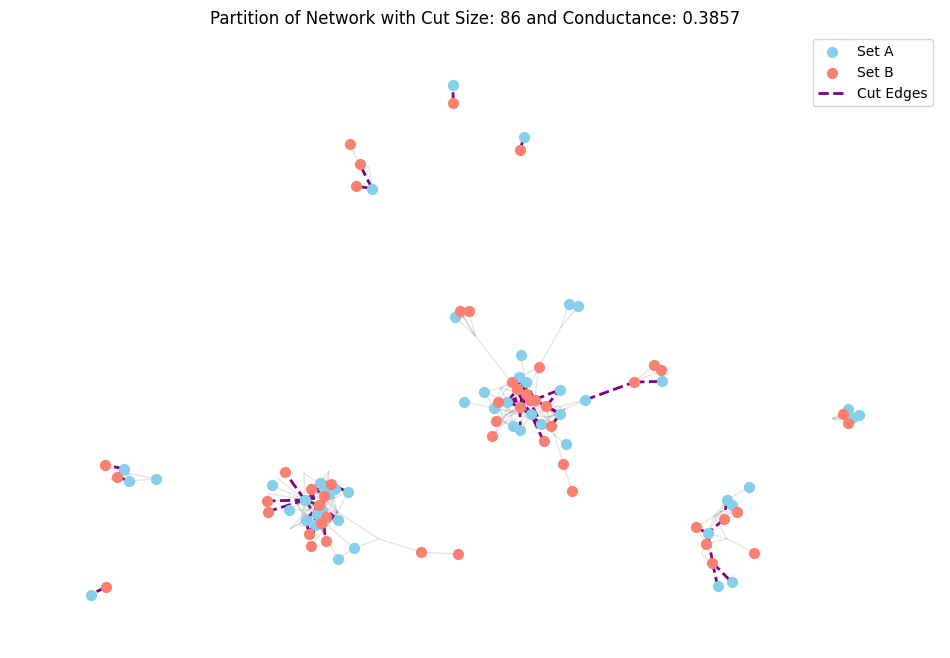

In [13]:
pos = nx.spring_layout(facebook_G, seed=42)

plt.figure(figsize=(12, 8))
# Draw nodes in set A and set B with distinct colors
nx.draw_networkx_nodes(facebook_G, pos, nodelist=set_A, node_color="skyblue", label="Set A", node_size=50)
nx.draw_networkx_nodes(facebook_G, pos, nodelist=set_B, node_color="salmon", label="Set B", node_size=50)

# Highlight the cut edges specifically
cut_edges = [(u, v) for u, v in facebook_G.edges() if (u in set_A and v in set_B) or (u in set_B and v in set_A)]
nx.draw_networkx_edges(facebook_G, pos, edgelist=cut_edges, edge_color="purple", width=2, style="dashed", label="Cut Edges")

# Draw all remaining edges with a low-opacity gray to avoid interference with the cut edges
non_cut_edges = [e for e in facebook_G.edges() if e not in cut_edges]
nx.draw_networkx_edges(facebook_G, pos, edgelist=non_cut_edges, edge_color="gray", alpha=0.2)

plt.title(f"Partition of Network with Cut Size: {cut_size} and Conductance: {conductance:.4f}")
plt.legend()
plt.axis("off")
plt.show()


### b. Please repeat the process mentioned in (a) again but with different sets of nodes. What differences have you observed? What cause the differences?

In [19]:
# Repeat with a new seed 
random.seed(43)  
# Create new sets C and D
set_C = set(random.sample(facebook_nodes, 50))
set_D = set(random.sample([n for n in facebook_nodes if n not in set_C], 50))

# Calculate the new cut size
cut_size = len([1 for u, v in facebook_G.edges() if (u in set_C and v in set_D) or (u in set_D and v in set_C)])

# Calculate Conductance
volume_C = sum(facebook_G.degree(n) for n in set_C)
volume_D = sum(facebook_G.degree(n) for n in set_D)
conductance = cut_size / min(volume_C, volume_D)

cut_size, conductance

C:\Users\35262\AppData\Local\Temp\ipykernel_14704\2569232933.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  set_C = set(random.sample(facebook_nodes, 50))


(95, 0.4377880184331797)

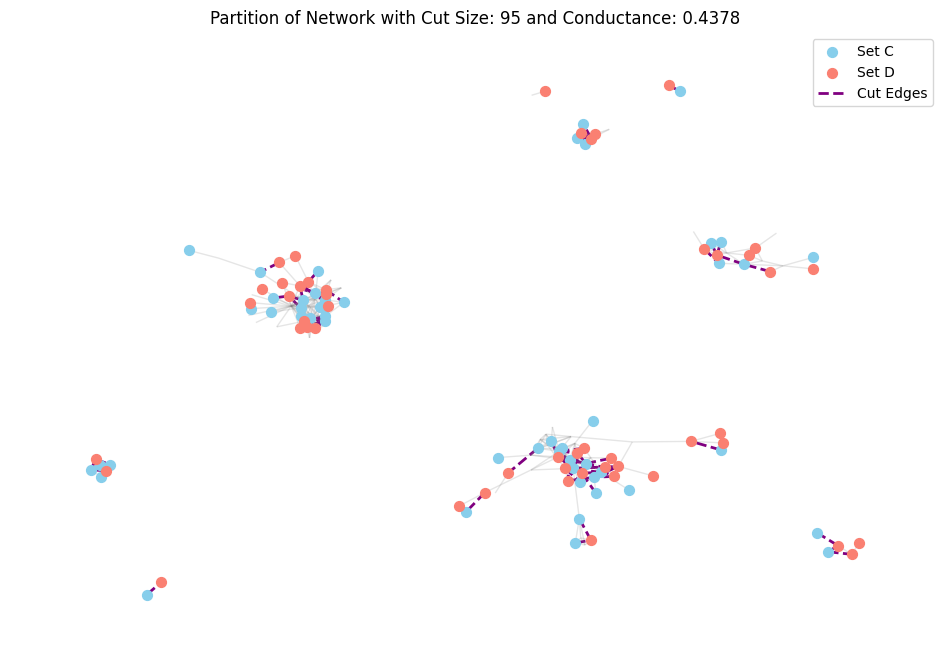

In [20]:
pos = nx.spring_layout(facebook_G, seed=43)
plt.figure(figsize=(12, 8))

# Draw nodes in set A and set B with distinct colors
nx.draw_networkx_nodes(facebook_G, pos, nodelist=set_C, node_color="skyblue", label="Set C", node_size=50)
nx.draw_networkx_nodes(facebook_G, pos, nodelist=set_D, node_color="salmon", label="Set D", node_size=50)

# Highlight the cut edges specifically
cut_edges = [(u, v) for u, v in facebook_G.edges() if (u in set_C and v in set_D) or (u in set_D and v in set_C)]
nx.draw_networkx_edges(facebook_G, pos, edgelist=cut_edges, edge_color="purple", width=2, style="dashed", label="Cut Edges")

# Draw remaining edges with low-opacity gray
non_cut_edges = [e for e in facebook_G.edges() if e not in cut_edges]
nx.draw_networkx_edges(facebook_G, pos, edgelist=non_cut_edges, edge_color="gray", alpha=0.2)

plt.title(f"Partition of Network with Cut Size: {cut_size} and Conductance: {conductance:.4f}")
plt.legend()
plt.axis("off")
plt.show()

#### The differences in cut size and conductance between the two partitions come from the random selection of nodes in each set, which leads to variations in node connectivity. More edges between sets result in a higher cut size, while conductance is determined by this cut size in relation to the minimum volume of the two sets, reflecting how well the partitions connect to each other relative to their internal structure. However, the small differences in cut size and conductance between the two partitions suggest that both are subgraphs of the larger Facebook network, which imposes a similar connectivity structure on each set.

### c. Please output the Laplacian matrix of Facebook-Ego dataset.

In [21]:
# Compute the Laplacian matrix
laplacian_matrix = nx.laplacian_matrix(facebook_G).toarray()

# Output the Laplacian matrix
print(laplacian_matrix)

[[ 6 -1  0 ...  0  0  0]
 [-1  6  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1 -1]
 [ 0  0  0 ...  0 -1  1]]


### d. Please return the list of cliques over the entire Facebook-Ego dataset.

In [28]:
# Find all cliques in the graph
cliques = list(nx.find_cliques(facebook_G))

# Output the list of cliques
pprint(cliques)

[[3733, 3861],
 [3735, 3867, 3753],
 [3735, 3867, 3740],
 [3737, 3824, 3873, 3734],
 [3737, 3824, 3734, 3800],
 [3737, 3824, 3790, 3804, 3800, 3838],
 [3737, 3824, 3790, 3804, 3860, 3858],
 [3737, 3824, 3790, 3804, 3860, 3838],
 [3738, 3754],
 [3738, 3859],
 [3738, 3829, 3752, 3761],
 [3738, 3829, 3821],
 [3738, 3782],
 [3739, 3743, 3874, 3819, 3868],
 [3739, 3743, 3871],
 [3740, 3865],
 [3740, 3867, 3835, 3862],
 [3740, 3867, 3835, 3815],
 [3742, 3849, 3861],
 [3743, 3857, 3868],
 [3745, 3812],
 [3746, 3846],
 [3747, 3776, 3809, 3791, 3766],
 [3747, 3776, 3809, 3791, 3783],
 [3749, 3789, 3751],
 [3751, 3787],
 [3752, 3764],
 [3753, 3867, 3835],
 [3753, 3876, 3778],
 [3753, 3773, 3778],
 [3753, 3773, 3802],
 [3753, 3773, 3850],
 [3753, 3835, 3802],
 [3753, 3835, 3850],
 [3757, 3836, 3837, 3774, 3759],
 [3758, 3777, 3829],
 [3758, 3855, 3810],
 [3758, 3761, 3829],
 [3758, 3793, 3825, 3764],
 [3758, 3793, 3810, 3833],
 [3758, 3793, 3810, 3764],
 [3758, 3793, 3810, 3782, 3768, 3786],
 [37